## Import Libraries
### We require few libraries to read and analyse the data. In this section, all the required libraries are imported.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
import numpy as np

## Data Understanding

#### Initially we are reading the data related to Corona cases and vacctination provided by our-world-in-data. To be up-to-date we directly assign the dataset URL so that when ever we run this cell latest updated data is pulled.

In [423]:
# collecting the data
csv_url="https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

In [424]:
# reading the data
df = pd.read_csv(csv_url)

In [425]:
# just showing the output of the data collected
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


#### As we can see above, the dataset has many columns like iso_code, location, total_cases, etc. and the table also shows that there are many null/zero values. Donot worry about the NaN values we will clean it in later steps. We will get the overview of data like data type of features, a number of null values in each column, etc. using **info()**

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197465 entries, 0 to 197464
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    197465 non-null  object 
 1   continent                                   186014 non-null  object 
 2   location                                    197465 non-null  object 
 3   date                                        197465 non-null  object 
 4   total_cases                                 189540 non-null  float64
 5   new_cases                                   189297 non-null  float64
 6   new_cases_smoothed                          188123 non-null  float64
 7   total_deaths                                170942 non-null  float64
 8   new_deaths                                  170915 non-null  float64
 9   new_deaths_smoothed                         169758 non-null  float64
 

#### We can get the statistics of each feature present in our dataset by using describe() function in pandas. Some of the information that we get include count, max, min, standard deviation, median, etc.

In [427]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.895400e+05,1.892970e+05,1.881230e+05,1.709420e+05,170915.000000,169758.000000,188667.000000,188424.000000,187255.000000,170082.000000,...,122899.000000,121214.000000,79852.000000,144411.000000,184681.000000,158327.000000,6.712000e+03,6712.000000,6712.000000,6712.000000
mean,3.500601e+06,1.228805e+04,1.231176e+04,6.653659e+04,153.677893,154.579279,44830.642795,185.322740,185.509737,607.753956,...,10.639935,32.793936,50.904439,3.084859,73.645754,0.725116,4.214398e+04,9.908874,15.543936,1161.874855
std,2.199443e+07,8.655746e+04,8.488703e+04,3.459504e+05,777.948310,761.933637,83071.127486,939.036218,611.773334,893.500511,...,10.577659,13.533378,31.852751,2.552029,7.444207,0.149721,1.166042e+05,15.976706,28.878253,1606.463082
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.953750e+03,0.000000e+00,6.571000e+00,9.800000e+01,0.000000,0.143000,830.898000,0.000000,1.480000,24.675000,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,-1.850000e+00,-0.030000,-0.232500,-0.845097
50%,3.762000e+04,6.800000e+01,9.928600e+01,9.660000e+02,1.000000,1.857000,7074.038000,9.754000,19.219000,173.280000,...,6.300000,31.400000,49.839000,2.500000,75.050000,0.743000,4.599300e+03,6.780000,7.515000,612.671410
75%,4.045750e+05,1.009000e+03,1.121857e+03,8.699750e+03,17.000000,18.286000,56033.877500,101.215000,130.220500,886.987000,...,19.300000,41.300000,83.241000,4.000000,79.070000,0.845000,2.941022e+04,14.890000,21.570000,1840.485228
max,5.454557e+08,4.080568e+06,3.438035e+06,6.332579e+06,18156.000000,14783.714000,706541.904000,208049.887000,37617.428000,6399.483000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.217716e+06,111.010000,375.000000,9725.192865


### Few details of the dataset that we require

In [428]:
print('1. The current dataset has all the data collected from',df.date.min(),'till',df.date.max())
print('2. Total number of countries registering COVID-19 cases are:',len(df.location.unique()))
print('3. The total number cases all over the world till now:',df.total_cases.max(), 'and total number of deaths till now are:', 
         df.total_deaths.max())
print('4. Total number of people fully vaccinated till now are:',len(df.people_fully_vaccinated.unique()))

1. The current dataset has all the data collected from 2020-01-01 till 2022-06-28
2. Total number of countries registering COVID-19 cases are: 244
3. The total number cases all over the world till now: 545455677.0 and total number of deaths till now are: 6332579.0
4. Total number of people fully vaccinated till now are: 47851


#### ..........................................................................................................................................................................................................................

## Data Preperation

Different people follow different steps of data preperation

### Select Data

#### We will select the data that we are intrested to work with from the above read dataset which makes data handling easy

We will be only working with the data three countries but before that let's have some fun by visulaizing all the countries in the form of art by using WorldCLoud library. The text size of each country depends on how many times the country is repeated in the dataset.

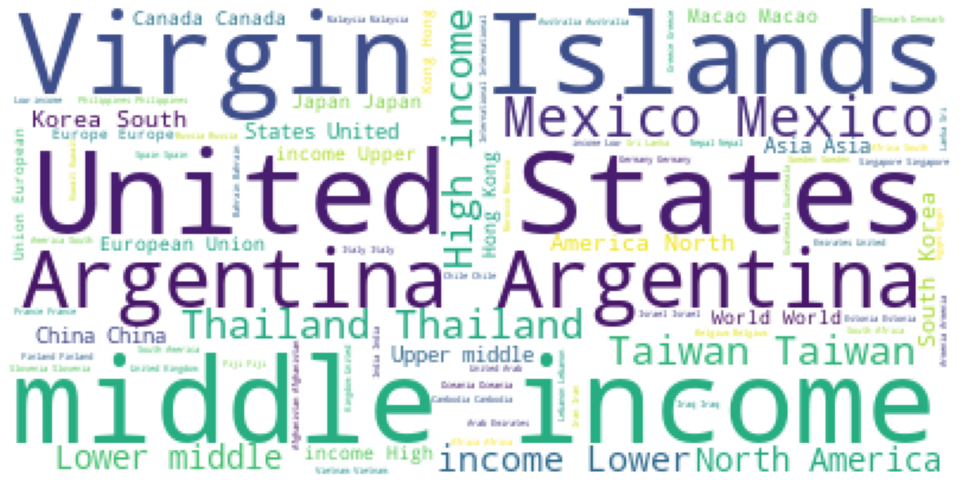

In [429]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df.location))
plt.figure(figsize=(17,9))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

In [430]:
# selecting the data of 3 countries that we are interested in
df_GER=df['location']=='Germany'
df_IND=df['location']=='India'
df_USA=df['location']=='United States'

In [431]:
df_countries= df_GER | df_IND | df_USA 

In [524]:
df_total_list=df[df_countries]

In [526]:
df_total_list.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
66594,DEU,Europe,Germany,2020-01-27,1.0,1.0,NaN,NaN,NaN,NaN,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
66595,DEU,Europe,Germany,2020-01-28,4.0,3.0,NaN,NaN,NaN,NaN,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
66596,DEU,Europe,Germany,2020-01-29,4.0,0.0,NaN,NaN,NaN,NaN,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
66597,DEU,Europe,Germany,2020-01-30,4.0,0.0,NaN,NaN,NaN,NaN,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
66598,DEU,Europe,Germany,2020-01-31,5.0,1.0,NaN,NaN,NaN,NaN,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN


as stated above there are lot of NaN values in the dataset and we will be cleaning the dataset below

### Data Cleaning

#### There are many ways of cleaning the datasets. Some of the steps among them are shown below

* Handling and Filling null values


In [527]:
# getting sum of all the null values in each column
df_total_list.isnull().sum()

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
human_development_index                       0
excess_mortality_cumulative_absolute       2416
excess_mortality_cumulative                2416
excess_mortality                           2416
excess_mortality_cumulative_per_million    2416
Length: 67, dtype: int64

In [534]:
# filling out the NaN values with values=0
df_cleaned = df_total_list.fillna(value=0, inplace=True)


C:\Users\SLP279\AppData\Local\Temp\ipykernel_28636\811109595.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [539]:
df_total_list.head()

None


Now, in the above table you can see that all the NaN values are replaced with 0.0 (float64 type).
Even we change the data type of a feature in the following way

* Change the data type of features

In [475]:
# changing the feature type , this can be done to features that you are interested to work with, 
# but I will be handling with float64 values
df_total_list.people_vaccinated = df_total_list.people_vaccinated.astype(int)


C:\Users\SLP279\AppData\Local\Temp\ipykernel_28636\4233240320.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### ..........................................................................................................................................................................................................................

## Data Visualization

### We have prepared the data that we want to analyze and now its time to visualize the desired data 

We will try to plot an bar graph showing total cases resgistered till now in the countries that we selected above.

In [480]:
total_cases_country_wise={} # initially an empty dictionary is assigned
for location in df_total_list.location.unique():       # to loop among the list of countries we selected above
#for location in df.location.unique():                 # to loop amaong all the countries in the dataset
    total_corona_cases = 0
    for i in range(len(df)) :
        if df.location[i] == location:
            total_corona_cases += df_total_list.new_cases[i]      # appending and summing up new cases to get total cases registered till now
    total_cases_country_wise[location] = total_corona_cases
    # made an saperate dictionary from df and converting it to a data frame
    df_total_cases_country_wise = pd.DataFrame.from_dict(total_cases_country_wise,
                                                         orient='index',
                                                         columns = ['total no. of cases'])
df_total_cases_country_wise.sort_values(by = 'total no. of cases', ascending = False, inplace = True)
df_total_cases_country_wise

,total no. of cases
United States,87217672.0
India,43433345.0
Germany,28048246.0


In [483]:
# plotting the graph using plotly express package
fig1 = px.bar(df_total_cases_country_wise, y='total no. of cases', x=df_total_cases_country_wise.index, color='total no. of cases', color_discrete_sequence= px.colors.sequential.Viridis_r )
fig1.update_layout(
    title={
            'text' : "Total Covid-19 cases till now",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Countries",
    yaxis_title="Total cases",
    legend_title="Total cases"
)
fig1.show()

We can also visualize the COVID-19 cases increasing every month for selected countries as shown in *fig2*

In [486]:
fig2=px.line(df_total_list, x= "date", y= "total_cases",color='location', title= "COVID-19 Cases")
fig2.show()

We will visualize the rate of corona cases increse with respective to population in *fig3*

In [444]:
df_total_list['total_infection_mean']=df_total_list['total_cases']/df_total_list['population']

C:\Users\SLP279\AppData\Local\Temp\ipykernel_28636\849069533.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [550]:
fig3=px.line(df_list, x= "date", y= "total_infection_mean",color='location', title= "COVID-19 infection rate w.r.t population")
fig3.update_xaxes(range=["2020-04-01","2022-06-25"]) # this range is selected because In most countries corona cases started 
                                                     # registering from March 2020
fig3.show()

We can also visualize the vaccination rate same as corona cases fot the countries selected. Before plotting we will again replace 0.0 with NaN by loading dataset again and then fill the Nan values with the preceeding number using forwardfill(*ffill*) in pandas

In [544]:
# replace the nan values again with 0 
#df_total_list['people_fully_vaccinated'].replace(to_replace=0.0, value=np.nan)#, method='ffill') #TODO
df_total_list=df[df_countries]
# now filling the Nan values with the forward/pre values in column so that while visualization line doesnot again go to zero line
df_total_list.loc[:,['people_fully_vaccinated']]= df_total_list.loc[:,['people_fully_vaccinated']].ffill()

C:\Users\SLP279\AppData\Local\Temp\ipykernel_28636\3379490081.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [547]:
df_total_list['total_vaccination_mean']=df_total_list['people_fully_vaccinated']/df_total_list['population']

C:\Users\SLP279\AppData\Local\Temp\ipykernel_28636\2877640159.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [549]:
fig4=px.line(df_total_list, x= "date", y= "total_vaccination_mean",color='location', title= "Vaccination rate w.r.t population")
fig4.update_xaxes(range=["2021-03-01","2022-06-25"])
fig4.update_yaxes(range=[0,1])
fig4.show()

In [553]:
# helper function
def plot_till_date(value1, value2, title, color1, color2) : 
    so_far_dict = {}
    for dates in df.date.unique() : 
        so_far_dict[dates], value1_count, value2_count = [], 0, 0
        for i in range(len(df)) : 
            if df.date[i] == dates : 
                value1_count += df[value1][i]
                value2_count += df[value2][i]
#         if dates not in so_far_dict.keys() : 
        so_far_dict[dates].append(value1_count) 
        so_far_dict[dates].append(value2_count)
    so_far_df = pd.DataFrame.from_dict(so_far_dict, orient = 'index', columns=[value1, value2])
    so_far_df.reset_index(inplace = True)
#     return so_far_df
    so_far_df.sort_values(by='index', inplace = True)
    plot = go.Figure(data=[go.Scatter( 
            x = so_far_df['index'], 
            y = so_far_df[value1], 
            stackgroup='one', 
            name = value1, 
            marker_color= color1), 
                           go.Scatter( 
            x = so_far_df['index'], 
            y = so_far_df[value2], 
            stackgroup='one',
            name = value2, 
            marker_color= color2) 
        ]) 
    plot.update_layout(
    title={
            'text' : title,
            'y':0.95,
            'x':0.5
        },
        xaxis_title="Date"
    )
    return plot.show()

In [ ]:
plot_till_date('people_fully_vaccinated', 'people_vaccinated','People vaccinated vs Fully vaccinated till date', '#c4eb28', '#35eb28')


## .............................................................Thank you........................................................................